#Início de um sonho

Dando segmento a esse humilde projeto, a minha intenção é adicionar um outro banco de dados com outras estatísticas que possam complementar as análises sobre a carreira de Lionel Messi. Como a proposta é analisar o Messi, começaremos do começo de fato. Ou seja, suas primeiras temporadas antes do protagonismo. Nossa linha de corte aqui são as quatro primeiras temporadas da carreira dele, todas sob o comando de Frank Rijkaard.

Mas como nosso dataset se limita aos gols, analisar seu aumento de relevância para a equipe passa além dos gols. Então fui ao FBRef.com buscar outros números para que pudéssemos nos embasar melhor e adicionamos mais dois datasets: messiintl.csv (estatísticas de jogos por competições internacionais, basicamente a UEFA Champions League) e messileague.csv (com jogos pelas ligas nacionais, a La Liga e a Ligue 1). Não havia estatísticas da Copa do Rei, Eliminatórias da Copa e amistosos da seleção.

Então é nesse momento em que trazemos os dois datasets e os unimos em um dataframe para que possamos fazer a análise.

In [ ]:
#Preparando o ambiente

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Essa parte foi mais complicada do que eu imaginei inicialmente. Minha ideia era pegar os dois datasets e somá-los. Isso seria até simples mas na prática,  cada coluna era uma história diferente, então dar uma ordem simples ao Python sem especificar o que quer é a receita certa para que a nova tabela saia completamente errada.

Como em ambas as tabelas as colunas tem o mesmo nome, já facilita o trabalho. Baseamos essa terceira tabela na coluna 'Season'. Escolhi remover a coluna 'Squad' de uma das tabelas senão duplicaria um resultado redundante. Também separei os 'LgRank' de ambas as tabelas, pois não faz sentido somá-las, mas seu resultados são relevantes. Então um deles virou 'ResultUCL' para discriminar o resultado de Messi na principal competição europeia.

Também dropamos 'Comp', 'Age' e '90s' pois são colunas que não apresentam relevância para a análise que pretendo fazer. Aí unimos as tabelas, somamos as estatísticas e criamos um arquivo CSV com o resultado.

In [ ]:
# Carregar as bases de dados e defini-las como df
df1 = pd.read_csv("/content/messiintl.csv", sep=';')
df2 = pd.read_csv("/content/messileague.csv", sep=';')

# Renomear a coluna 'LgRank' em df1 para 'ResultUCL'
df1.rename(columns={'LgRank': 'ResultUCL'}, inplace=True)

# Remover a coluna 'Squad' de df1 temporariamente
squad_column = df1.pop('Squad')

# Descartar as colunas que não são relevantes
df1.drop(columns=['Comp', 'Age', '90s'], inplace=True)
df2.drop(columns=['Comp', 'Age', '90s'], inplace=True)

# Reintroduzir a coluna 'Squad' de df1 após a combinação
df1['Squad'] = squad_column

# Somar todas as colunas numéricas agrupando por 'Season' e 'Squad'
df_summed1 = df1.groupby(['Season', 'Squad'], as_index=False).sum()
df_summed2 = df2.groupby(['Season', 'Squad'], as_index=False).sum()

# Unir as duas tabelas somando as colunas numéricas correspondentes
df_final = pd.merge(df_summed1, df_summed2, on=['Season', 'Squad'], how='outer', suffixes=('_intl', '_league'))

# Somar as colunas numéricas que possuem os mesmos nomes após a junção
for column in df_final.columns:
    if '_intl' in column:
        base_column = column.replace('_intl', '')
        league_column = base_column + '_league'
        if league_column in df_final.columns:
            df_final[base_column] = df_final[column].fillna(0) + df_final[league_column].fillna(0)
            df_final.drop([column, league_column], axis=1, inplace=True)

# Preencher a coluna ResultUCL com os dados de df1
df_final['ResultUCL'] = df_final['ResultUCL'].combine_first(df1['ResultUCL'])

# Salvar o resultado em um arquivo CSV
df_final.to_csv('/content/messi_combined_season.csv', index=False, sep=';')

df_final.head()

,Season,Squad,ResultUCL,LgRank,MP,Starts,Min,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR
0,2004-2005,Barcelona,R16,1st,8,1,160,1,0,1,1,0,0,0,0
1,2005-2006,Barcelona,W,1st,23,15,1233,7,4,11,7,0,0,2,0
2,2006-2007,Barcelona,R16,2nd,31,27,2368,15,3,18,15,0,0,3,0
3,2007-2008,Barcelona,SF,3rd,36,32,2701,16,14,30,11,5,5,4,0
4,2008-2009,Barcelona,W,1st,43,37,3443,32,16,48,29,3,4,3,0


**Legenda**

---



**Season:** Temporada

**Squad:** Equipe que Messi defendeu na temporada

**ResultUCL:** Até onde a equipe foi na UEFA Champions League da temporada

**LgRank:** Colocação da equipe na liga nacional da temporada

**MP:** Partidas jogadas

**Starts:** Partidas iniciadas como titular

**Min:** Minutos totais jogados

**Gls:** Gols marcados

**Ast:** Assistência

**G+A:** Soma de gols e assistências

**G-PK:** Gols marcados excetuando os de pênalti

**PK:** Gols de pênalti

**PKAtt:** Pênaltis batidos

**CrdY:** Cartões amarelos

**CrdR:** Cartões vermelhos

# Primeiras temporadas

Como a proposta é analisar o Messi, começaremos do começo de fato. Ou seja, suas primeiras temporadas antes do protagonismo. Nossa linha de corte aqui são as quatro primeiras temporadas da carreira dele, todas sob o comando de Frank Rijkaard. Estamos considerando apenas jogos pela La Liga e pela UEFA Champions League. A Copa do Rei são poucos jogos e é normal que o Barcelona use a competição para rodar o elenco então para a nossa análise, os números que temos é o suficiente. Primeiro vemos a evolução dos gols.

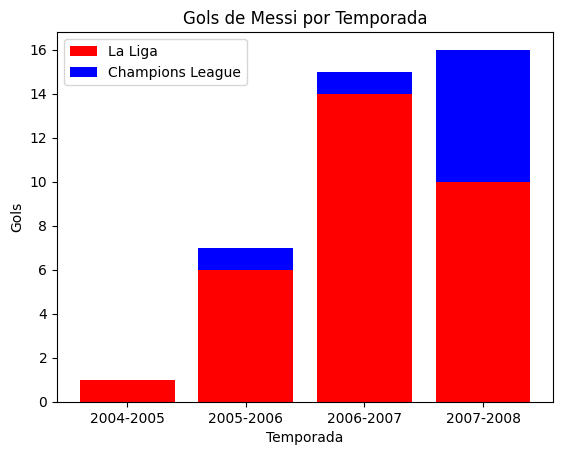

In [ ]:
# Considerando os gols das quatro primeiras temporadas
gols_liga = df2['Gls'].head(4)
gols_intl = df1['Gls'].head(4)

# Criando o gráfico de barras
fig, ax = plt.subplots()

# Plotando as barras
bar_liga = ax.bar(df2['Season'].head(4), gols_liga, label='La Liga', color='red')
bar_intl = ax.bar(df1['Season'].head(4), gols_intl, bottom=gols_liga, label='Champions League', color='blue')

# Adicionando labels e título
ax.set_xlabel('Temporada')
ax.set_ylabel('Gols')
ax.set_title('Gols de Messi por Temporada')
ax.legend()

plt.show()

Eu ia colocar uma linha no gráfico de cima com o número de assistências mas achei que ficou visualmente muito poluído e também não era um número que acrescentava tanto. Agora a evolução dos jogos disputados, comparando com os que ele iniciou como titular.

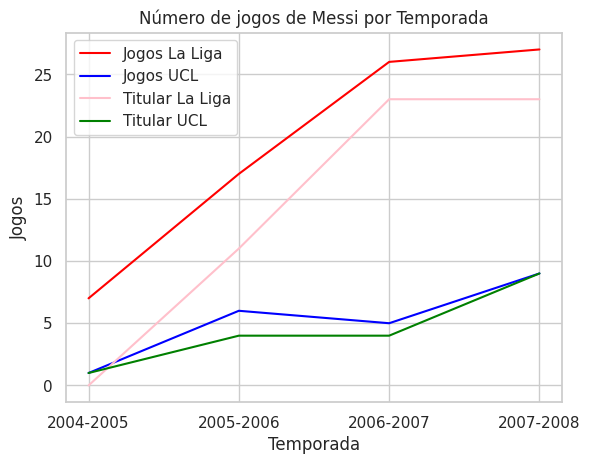

In [ ]:
# Considerando os jogos das quatro primeiras temporadas
mp_liga = df2['MP'].head(4)
mp_intl = df1['MP'].head(4)
titular_liga = df2['Starts'].head(4)
titular_intl = df1['Starts'].head(4)

# Criando o gráfico de linhas
fig, ax = plt.subplots()

# Plotando as linhas
ax.plot(df2['Season'].head(4), mp_liga, label='Jogos La Liga', color='red')
ax.plot(df1['Season'].head(4), mp_intl, label='Jogos UCL', color='blue')
ax.plot(df2['Season'].head(4), titular_liga, label='Titular La Liga', color='pink')
ax.plot(df1['Season'].head(4), titular_intl, label='Titular UCL', color='green')

# Adicionando labels e título
ax.set_xlabel('Temporada')
ax.set_ylabel('Jogos')
ax.set_title('Número de jogos de Messi por Temporada')
ax.legend()

plt.show()


# Insight

Em ambos os gráficos é notável a crescente dos números. Nenhum jogo de titular e apenas um gol marcado na temporada 2004/2005 é absolutamente normal para uma promessa de apenas 17 anos. Na temporada seguinte, o salto dos números poderia ser ainda maior se não fosse um drama que o acompanhou justamente nesse início de carreira: as lesões. Mas já foi o suficiente para se destacar num time campeão espanhol e europeu, em que pese ele não ter jogado a reta final da temporada por causa de uma entrada de um jogador do Chelsea num jogo da UEFA Champions League.

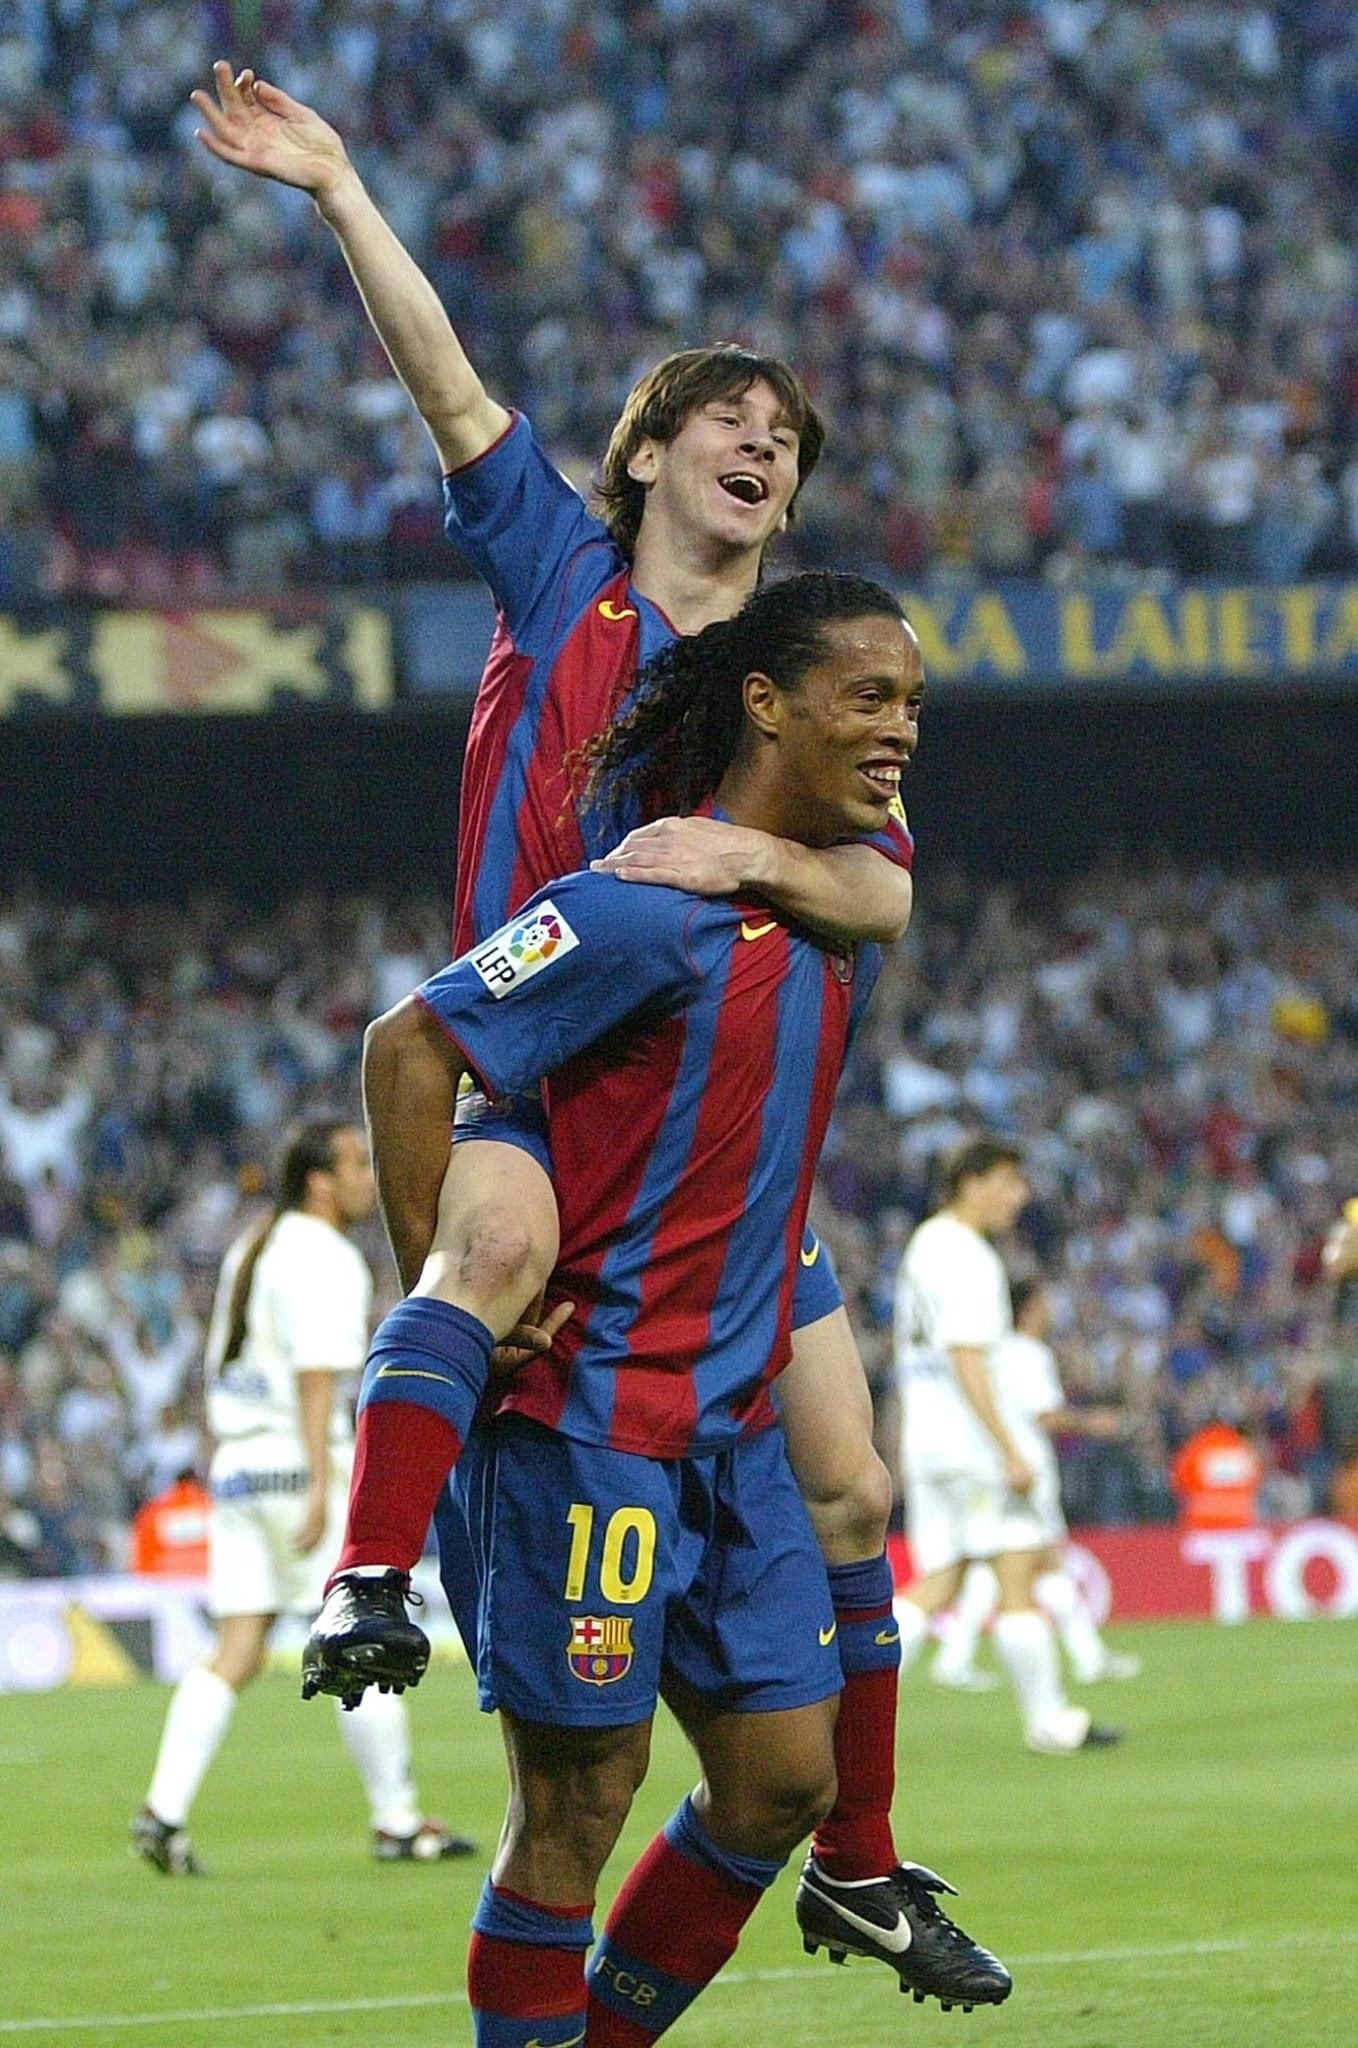

Em 2006/2007, a linha de jogos disputados já quese encosta na linha dos iniciados em ambas as competições. É titular absoluto de um time que acabara de ser campeão europeu. E também é nessa temporada que Ronaldinho, então estrela da companhia, cai de rendimento e abre espaço para Messi assumir o protagonismo. Entretanto, as lesões novamente o atrapalham, assim ele disputou apenas 26 dos 38 jogos na La Liga e viu o Real Madrid ser campeão empatando em pontos com o Barcelona e vencendo no critério de desempate. Também não conseguiu fazer seu time superar o Liverpool nas oitavas de final da UEFA Champions League, falhando em defender o título europeu.

Ou seja, foi uma temporada de evolução natural para Messi mas foi ruim para o Barcelona. O clube achou que foi uma temporada de exceção e não fez nehuma mudança profunda para 2007/2008 na esperança de recuperar os títulos perdidos. Não deu nada certo: terminou a La Liga em terceiro, abaixo até do Villarreal. Na principal competição europeia, pela primeira vez, Messi faz mais de um gol e assumiu definitivamente o protagonismo na caminhada que levou o Barcelona a ser derrotado nas semifinais contra o Manchester United.

Foi um período de evolução e afirmação. No fim, são ótimos números para um jovem de 20 anos. Mas não é spoiler dizer que os números futuros fazem esses parecerem bem modestos, digamos assim. Bom, a caminhada dele está só no início e creio que há muitos dados para explorar vindo por aí.

E, no fim das contas, o CSV gerado no início não foi usado. Mas fica o aprendizado 😂

Obrigado.